In [47]:
import pandas as pd
import numpy as np
nltk.download('punkt')
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...

[nltk_data]   Package punkt is already up-to-date!


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/spam1.csv', encoding='latin-1')

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1705,ham,Yun ah.now Ì_ wkg where?btw if Ì_ go nus sc. Ì...,NaN,NaN,NaN
5062,ham,Ok i also wan 2 watch e 9 pm show...,NaN,NaN,NaN
17,ham,Eh u remember how 2 spell his name... Yes i di...,NaN,NaN,NaN
3978,ham,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...,NaN,NaN,NaN
2524,spam,FREE entry into our å£250 weekly comp just sen...,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [10]:
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.sample(5)

,target,text
240,ham,Tomarrow final hearing on my laptop case so i ...
1954,ham,Good night. Am going to sleep.
3494,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...
859,ham,Did he just say somebody is named tampa
3857,ham,R u still working now?


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

0

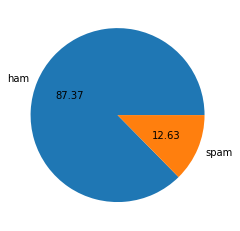

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

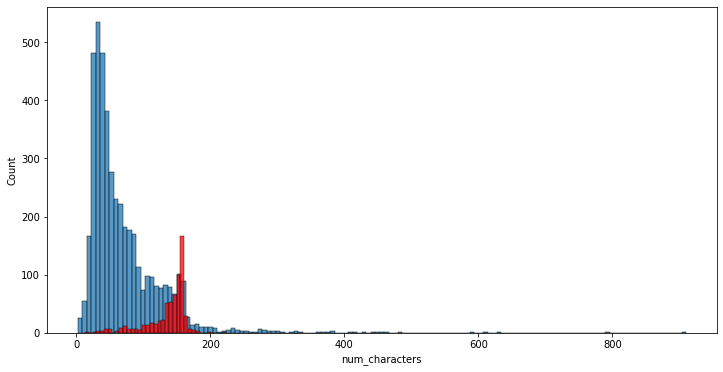

In [29]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

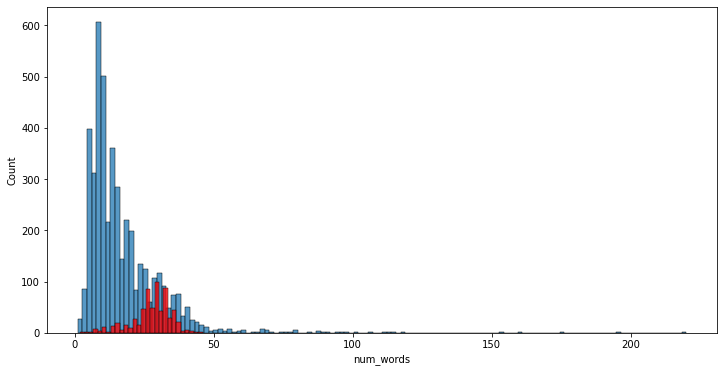

In [30]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

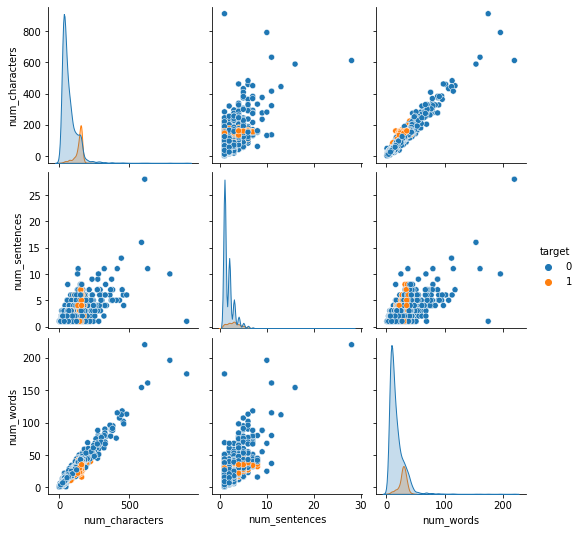

In [31]:
sns.pairplot(df, hue = 'target')

In [32]:
df.corr()

,target,num_characters,num_sentences,num_words
target,1.000000,0.384717,0.284901,0.262984
num_characters,0.384717,1.000000,0.638143,0.965770
num_sentences,0.284901,0.638143,1.000000,0.684541
num_words,0.262984,0.965770,0.684541,1.000000


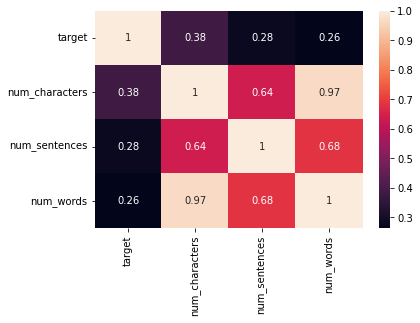

In [33]:
sns.heatmap(df.corr(), annot = True)

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

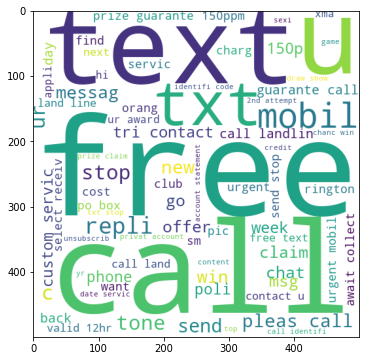

In [49]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

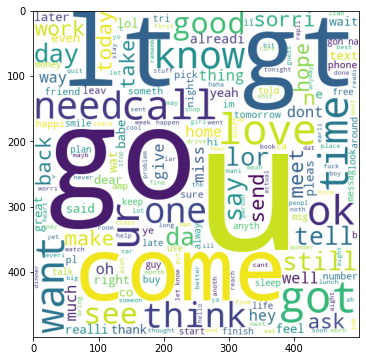

In [50]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [19]:
import nltk

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [25]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [27]:
df[df['target'] == 0].describe()

,target,num_characters,num_sentences,num_words
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,1.799601,17.120903
std,0.0,56.358207,1.278465,13.493725
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,1.000000,8.000000
50%,0.0,52.000000,1.000000,13.000000
75%,0.0,90.000000,2.000000,22.000000
max,0.0,910.000000,28.000000,220.000000


In [34]:
df[df['target'] == 1].describe()

,target,num_characters,num_sentences,num_words
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,2.967841,27.667688
std,0.0,30.137753,1.483201,7.008418
min,1.0,13.000000,1.000000,2.000000
25%,1.0,132.000000,2.000000,25.000000
50%,1.0,149.000000,3.000000,29.000000
75%,1.0,157.000000,4.000000,32.000000
max,1.0,224.000000,8.000000,46.000000


In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [44]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [52]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312

[[788 108]

 [ 27 111]]

0.5068493150684932


In [54]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625

[[896   0]

 [ 30 108]]

1.0


In [55]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921

[[895   1]

 [ 16 122]]

0.991869918699187


In [56]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))